In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import arviz as az
import seaborn as sns
import os
os.chdir("/content/drive/MyDrive/study/RStanBook/")

In [2]:
df = pd.read_table('data/data-attendance-1.txt', sep=',')
df.head()

,A,Score,Y
0,0,69,0.286
1,1,145,0.196
2,0,125,0.261
3,1,86,0.109
4,1,158,0.230


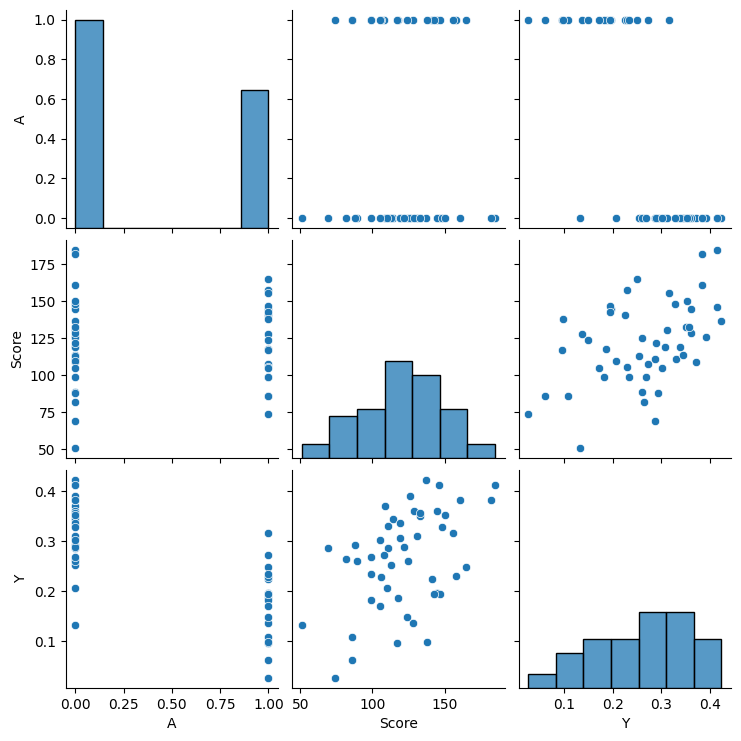

In [3]:
sns.pairplot(df)

In [4]:
# Yが正規分布に従っていると考える
A = df["A"]
# スケーリング(各パラメータの大きさの範囲を1程度にしたいので200点満点を200で割っておく)
# 大きさがバラバラだと探索が非効率になる
score = df["Score"] /200
Y = df["Y"]

model1 = pm.Model()
with model1:
    # score_data = pm.ConstantData("score_data", score)
    # A_data = pm.ConstantData("A_data", A)
    # Y_data = pm.ConstantData("Y_data", Y)
    score_data = pm.Data("score_data", score, mutable=True)
    A_data = pm.Data("A_data", A, mutable=True)
    Y_data = pm.Data("Y_data", Y, mutable=True)
    b1 = pm.Normal("b1", mu=0.0, sigma=10.0) # Aの回帰係数
    b2 = pm.Normal("b2", mu=0.0, sigma=10.0) # Scoreの回帰係数
    b3 = pm.Normal("b3", mu=0.0, sigma=10.0) # 切片

    mu = pm.Deterministic("mu", b1+A_data*b2+score_data*b3)
    sigma = pm.HalfNormal("sigma", sigma=10.0)
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y_data)
    err = pm.Deterministic("err", Y_data - mu) #　残差 練習問題(1), (2)

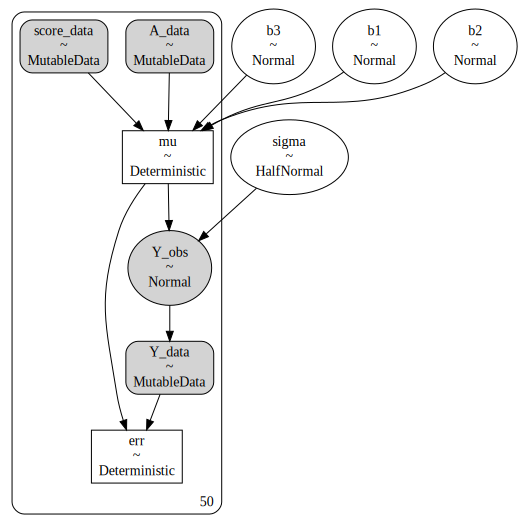

In [5]:
g = pm.model_to_graphviz(model1)
display(g)

In [6]:
with model1:
    idata1 = pm.sample(draws=2000, tune=500, chains=3, random_seed=42)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


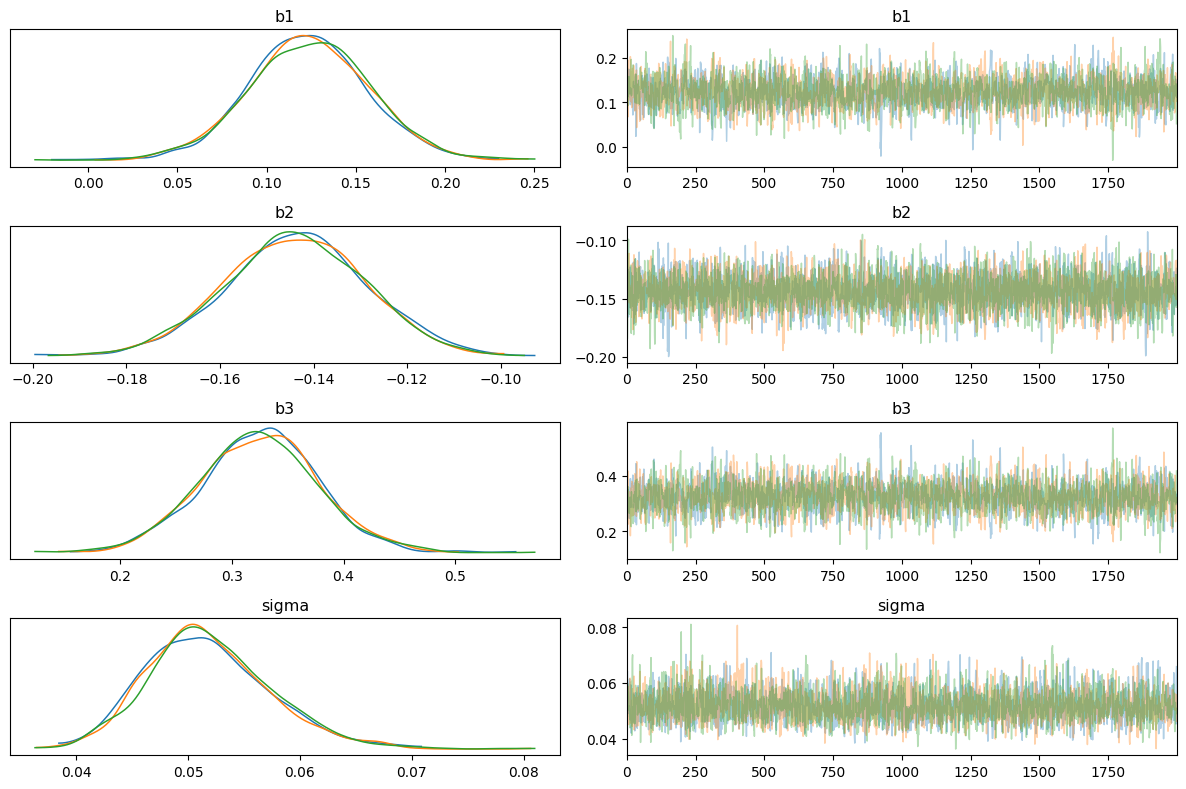

In [7]:
az.plot_trace(idata1, compact=False, var_names=["b1", "b2", "b3", "sigma"])
plt.tight_layout()

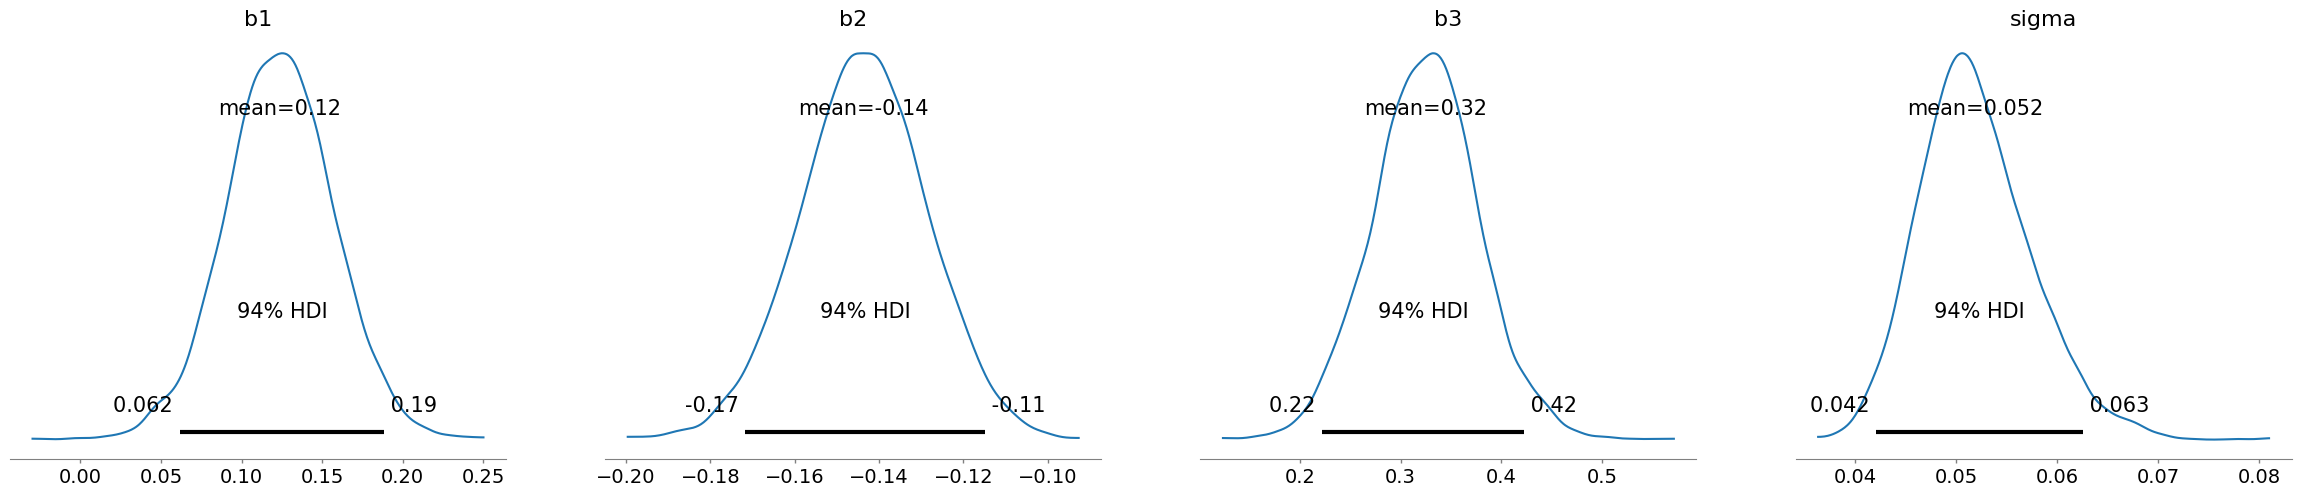

In [8]:
az.plot_posterior(idata1, var_names=["b1", "b2", "b3", "sigma"]);

In [9]:
az.summary(idata1, var_names=["b1", "b2", "b3", "sigma"], stat_funcs={'median': np.median})

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,median
b1,0.124,0.034,0.062,0.189,0.001,0.000,2503.0,2472.0,1.0,0.123
b2,-0.144,0.015,-0.172,-0.115,0.000,0.000,4292.0,3161.0,1.0,-0.144
b3,0.325,0.053,0.222,0.423,0.001,0.001,2522.0,2404.0,1.0,0.325
sigma,0.052,0.006,0.042,0.063,0.000,0.000,3637.0,3013.0,1.0,0.051


In [10]:
summary1 = az.summary(idata1, var_names=["mu"], filter_vars="like", stat_funcs={'median': np.median})
summary1["Y"] = df["Y"].tolist()
summary1

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,median,Y
mu[0],0.236,0.017,0.204,0.268,0.0,0.0,2742.0,2768.0,1.0,0.236,0.286
mu[1],0.215,0.013,0.190,0.241,0.0,0.0,4009.0,3690.0,1.0,0.215,0.196
mu[2],0.326,0.010,0.309,0.345,0.0,0.0,5312.0,4916.0,1.0,0.326,0.261
mu[3],0.119,0.015,0.090,0.148,0.0,0.0,3740.0,3852.0,1.0,0.119,0.109
mu[4],0.236,0.015,0.207,0.264,0.0,0.0,3488.0,3399.0,1.0,0.236,0.230
mu[5],0.339,0.010,0.320,0.358,0.0,0.0,5390.0,5131.0,1.0,0.339,0.350
mu[6],0.304,0.010,0.285,0.323,0.0,0.0,4264.0,4295.0,1.0,0.304,0.330
mu[7],0.218,0.014,0.192,0.243,0.0,0.0,3915.0,3616.0,1.0,0.219,0.194
mu[8],0.361,0.012,0.339,0.382,0.0,0.0,4467.0,4738.0,1.0,0.361,0.413
mu[9],0.359,0.011,0.338,0.380,0.0,0.0,4540.0,4585.0,1.0,0.359,0.360


In [11]:
with model1:
    # 各A, Scoreについてあらかじめ指定したchainとdrawsの数だけサンプルを作ってy_obsの予測を作る
    pm.sample_posterior_predictive(idata1, extend_inferencedata=True, random_seed=42)

In [12]:
idata1["posterior_predictive"]["Y_obs"].to_numpy().shape

(3, 2000, 50)

In [13]:
y_err = np.quantile(idata1["posterior_predictive"]["Y_obs"].to_numpy().reshape(-1,  50), [0.03, 0.97, 0.50], axis=0)
y_err[:, 0]

array([0.13048214, 0.34282994, 0.23555457])

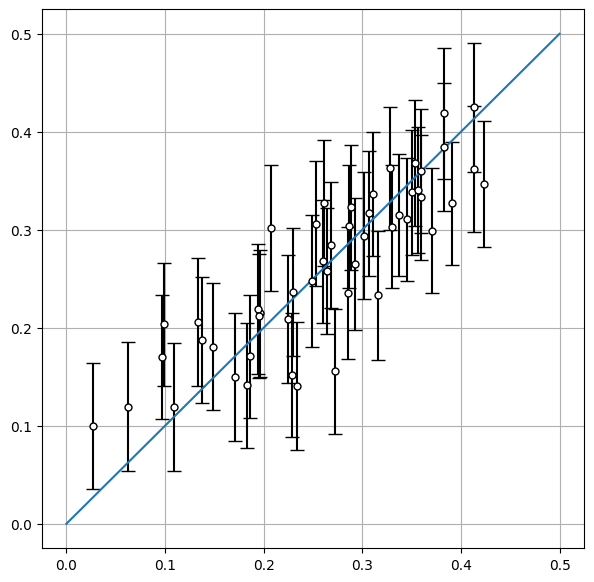

In [14]:
# 各生徒の予測分布からのサンプリング(信用区間を抜き取る)
y_cf = np.quantile(idata1["posterior_predictive"]["Y_obs"].to_numpy().reshape(-1,  50), [0.3, 0.97, 0.50], axis=0)
y = df["Y"] # 正解
y_pred = y_cf[-1] # 予測分布からの中央値
yerr = (y_cf[1] - y_cf[0])/2 # 予測分布からの信用区間

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.errorbar(y, y_pred, yerr=yerr, capsize=5, fmt='o', markersize=5, ecolor="black", markeredgecolor = "black", color='w')
ax.plot([0, 0.5], [0, 0.5], )
plt.grid()
plt.show()
plt.close()

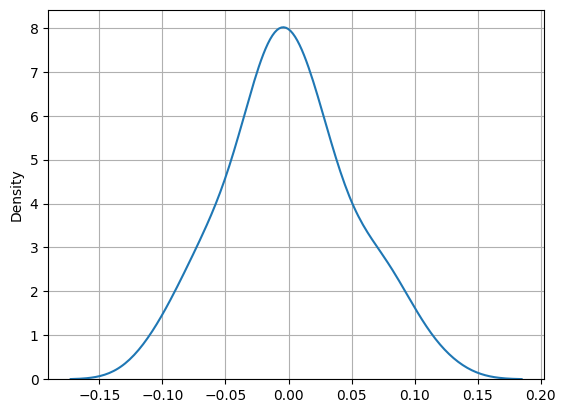

In [15]:
# 残差
# 各生徒の残差の代表地(中央値)を使ってカーネル密度推定
err = az.summary(idata1, var_names=["err"], stat_funcs={'median': np.median})["median"].tolist()
fig, ax = plt.subplots()
sns.kdeplot(err, ax=ax)
plt.grid()
plt.show()

In [16]:
idata1

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data
	> constant_data

5-2

In [17]:
df2 = pd.read_table('data/data-attendance-2.txt', sep=',')
df2["Ratio"] = df2['Y'] / df2['M'] # 出席率
df2["Score"] = df2["Score"] / 200 #スケーリング
df2.head()

,PersonID,A,Score,M,Y,Ratio
0,1,0,0.345,43,38,0.883721
1,2,1,0.725,56,40,0.714286
2,3,0,0.625,32,24,0.750000
3,4,1,0.430,45,33,0.733333
4,5,1,0.790,33,23,0.696970


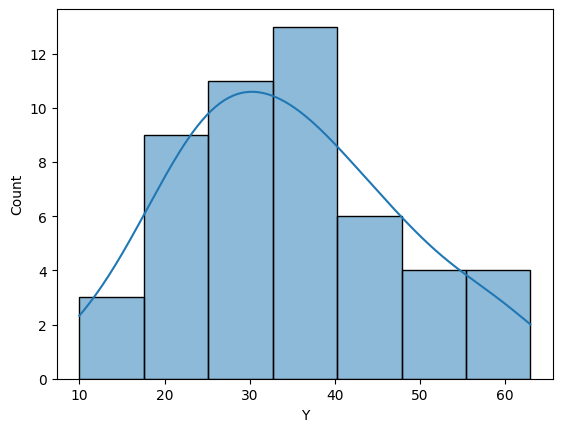

In [18]:
fig, ax = plt.subplots()
sns.histplot(df2["Y"], kde=True, ax=ax)
plt.show()

In [19]:
model2 = pm.Model()

# M回の授業で何回出席するかをなので二項分布を考える(Y/Mが1.0を超えることはないため正規分布は考えない)
with model2:
    A_data = pm.Data("A_data", df2["A"], mutable=True)
    Score_data = pm.Data("Score_data", df2["Score"], mutable=True)
    Y_data = pm.Data("Y_data", df2["Y"], mutable=True)
    M_data = pm.Data("M_data", df2['M'], mutable=True)

    b1 = pm.Normal("b1", mu=0.0, sigma=10.0)
    b2 = pm.Normal("b2", mu=0.0, sigma=10.0)
    b3 = pm.Normal("b3", mu=0.0, sigma=10.0)

    p = pm.Deterministic('p', pm.math.invlogit(b1 + b2*A_data + b3*Score_data))
    # 各生徒がM回授業をしたときの出席率pの二項分布に従うと考える
    y_obs = pm.Binomial("y_obs", n=M_data, p=p, observed=Y_data)

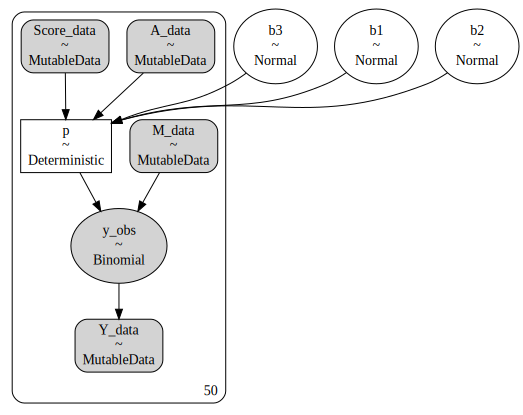

In [20]:
pm.model_to_graphviz(model2)

In [21]:
with model2:
    idata2 = pm.sample(draws=3000, tune=1000, chains=3, random_seed=42)

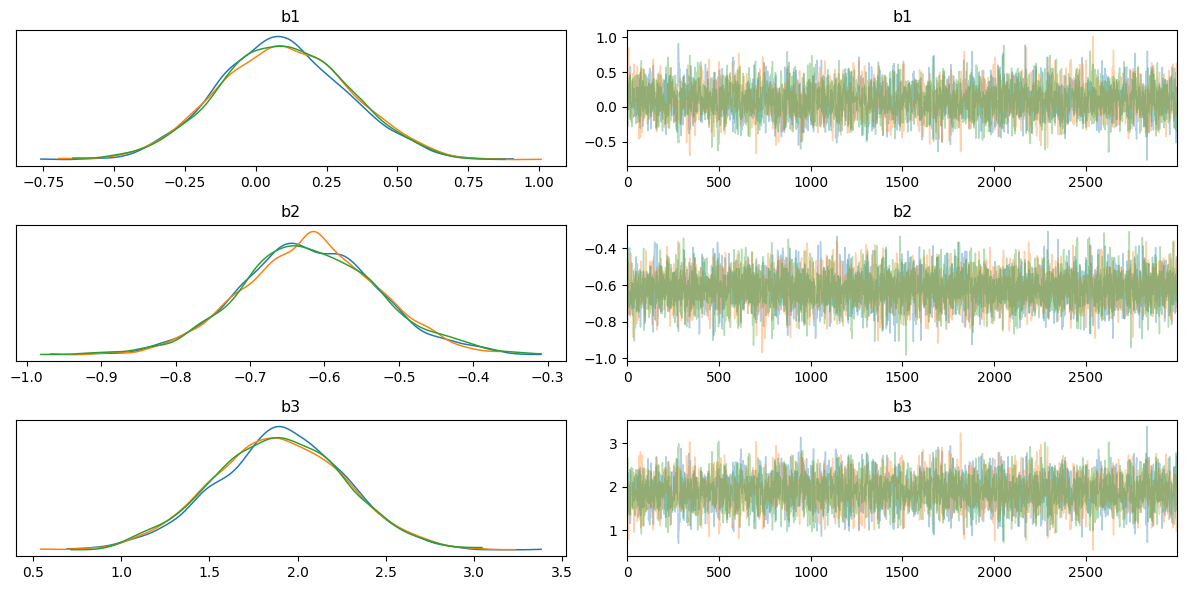

In [22]:
az.plot_trace(idata2, compact=False, var_names=["b1", "b2", "b3"])
plt.tight_layout();

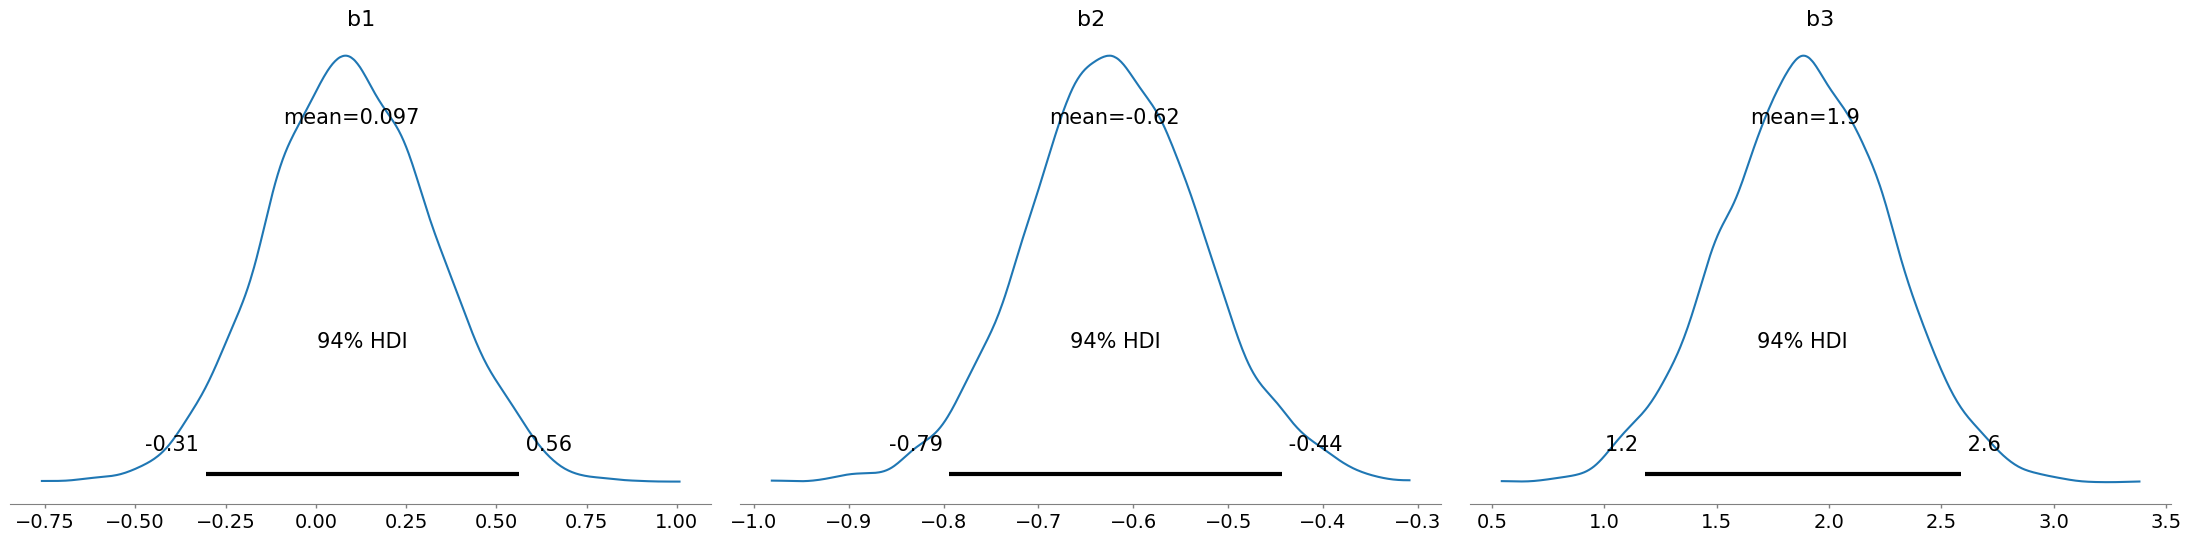

In [23]:
az.plot_posterior(idata2, var_names=["b1", "b2", "b3"])
plt.tight_layout();

In [24]:
az.summary(idata2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b1,0.097,0.231,-0.305,0.563,0.004,0.003,2819.0,3486.0,1.0
b2,-0.620,0.093,-0.794,-0.443,0.001,0.001,4426.0,3675.0,1.0
b3,1.894,0.371,1.179,2.585,0.007,0.005,2965.0,3461.0,1.0
p[0],0.679,0.025,0.633,0.725,0.000,0.000,2984.0,4116.0,1.0
p[1],0.700,0.016,0.671,0.731,0.000,0.000,4747.0,5839.0,1.0
p[2],0.782,0.012,0.761,0.805,0.000,0.000,5700.0,5279.0,1.0
p[3],0.572,0.023,0.530,0.615,0.000,0.000,4102.0,4367.0,1.0
p[4],0.725,0.018,0.690,0.760,0.000,0.000,3985.0,5407.0,1.0
p[5],0.795,0.012,0.774,0.818,0.000,0.000,5727.0,5333.0,1.0
p[6],0.759,0.013,0.734,0.782,0.000,0.000,4711.0,5559.0,1.0


5-3

In [25]:
df3 = pd.read_table('data/data-attendance-3.txt', sep=',')
df3["Weather_num"] = df3["Weather"].map({"A":0, "B":0.2, "C":1.0}) # 各天候の出席率に与えるであろう影響
df3["Score"] = df3["Score"] /200
df3.head()

,PersonID,A,Score,Weather,Y,Weather_num
0,1,0,0.345,B,1,0.2
1,1,0,0.345,A,1,0.0
2,1,0,0.345,C,1,1.0
3,1,0,0.345,A,1,0.0
4,1,0,0.345,B,1,0.2


In [26]:
df3.value_counts(["Weather", "Y"])

Weather  Y
A        1    953
B        1    500
A        0    306
C        1    269
B        0    230
C        0    138
dtype: int64

In [27]:
df3.value_counts("PersonID")

PersonID
37    88
9     78
20    77
22    77
8     76
31    75
21    70
24    68
50    67
10    64
23    63
6     61
35    59
16    59
41    57
15    56
2     56
36    55
13    53
43    53
46    51
26    51
25    50
7     49
30    49
38    47
4     45
18    45
19    45
12    44
1     43
40    41
14    40
48    38
17    38
28    37
34    37
11    34
5     33
42    32
3     32
44    31
27    29
49    23
33    23
45    23
47    22
39    22
29    18
32    12
dtype: int64

In [28]:
model3 = pm.Model()

with model3:
    A_data = pm.Data("A_data", df3["A"], mutable=True)
    Score_data = pm.Data("Score_data", df3["Score"], mutable=True)
    W_data = pm.Data("W_data", df3["Weather_num"], mutable=True)
    Y_data = pm.Data("Y_data", df3["Y"], mutable=True)

    b1 = pm.Normal("b1", mu=0.0, sigma=10.0)
    b2 = pm.Normal("b2", mu=0.0, sigma=10.0)
    b3 = pm.Normal("b3", mu=0.0, sigma=10.0)
    b4 = pm.Normal("b4", mu=0.0, sigma=10.0)

    p = pm.Deterministic("p", pm.invlogit( b1 + b2*A_data + b3*Score_data + b4*W_data ))
    y_obs = pm.Bernoulli("y_obs", p=p, observed=Y_data)

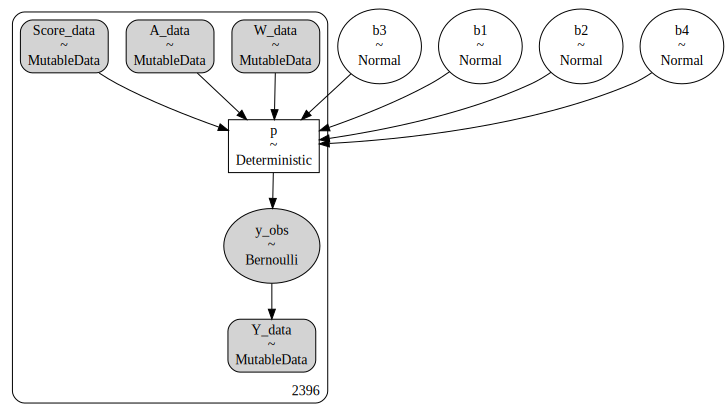

In [29]:
pm.model_to_graphviz(model3)

In [30]:
with model3:
    idata3 = pm.sample(draws=3000, tune=1000, chains=3, random_seed=42)

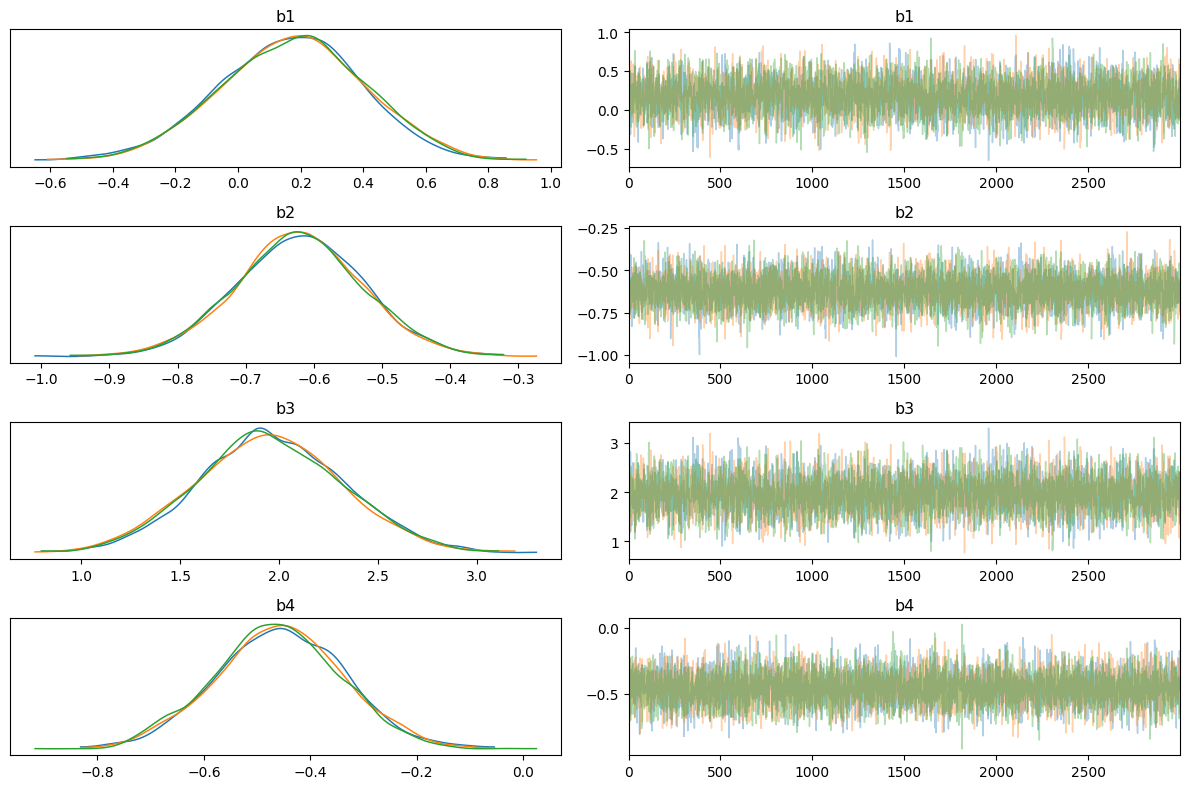

In [31]:
az.plot_trace(idata3, compact=False, var_names=["b1", "b2", "b3", "b4"])
plt.tight_layout();

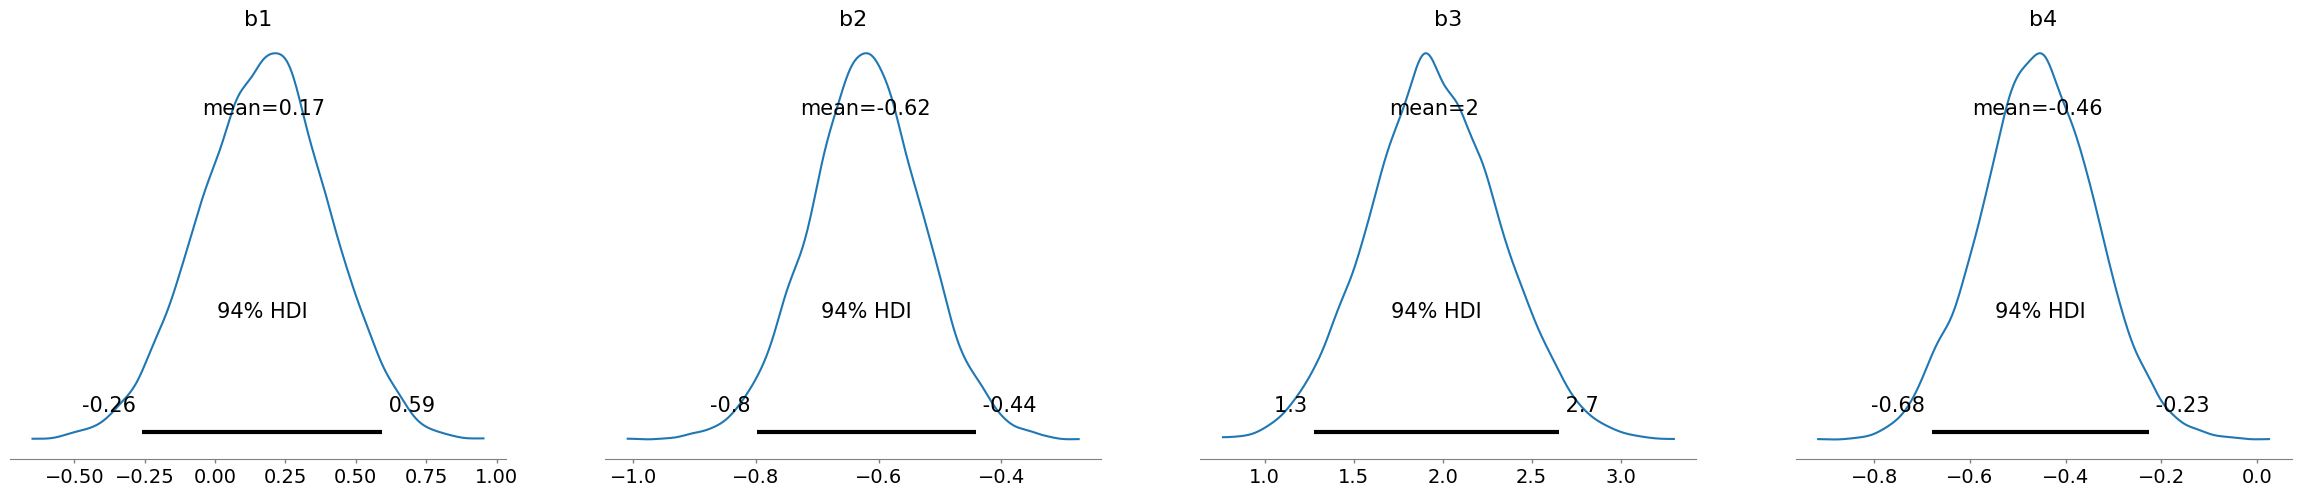

In [32]:
az.plot_posterior(idata3, var_names=["b1", "b2", "b3", "b4"]);

In [33]:
az.summary(idata3)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b1,0.173,0.228,-0.258,0.593,0.003,0.002,4378.0,4808.0,1.0
b2,-0.622,0.094,-0.797,-0.442,0.001,0.001,6560.0,5520.0,1.0
b3,1.954,0.367,1.276,2.655,0.006,0.004,4426.0,4773.0,1.0
b4,-0.459,0.120,-0.680,-0.226,0.001,0.001,7342.0,5963.0,1.0
p[0],0.680,0.024,0.633,0.725,0.000,0.000,4689.0,5385.0,1.0
...,...,...,...,...,...,...,...,...,...
p[2391],0.605,0.018,0.572,0.640,0.000,0.000,6440.0,6930.0,1.0
p[2392],0.627,0.019,0.593,0.664,0.000,0.000,6524.0,6792.0,1.0
p[2393],0.627,0.019,0.593,0.664,0.000,0.000,6524.0,6792.0,1.0
p[2394],0.515,0.030,0.459,0.570,0.000,0.000,6964.0,6587.0,1.0


In [34]:
with model3:
    pm.sample_posterior_predictive(idata3, extend_inferencedata=True, random_seed=42)

In [35]:
#y_cf = np.quantile(idata3["posterior_predictive"]["y_obs"].to_numpy().reshape(-1, len(df3)), 0.50, axis=0) # (2396, )
# 各学生の出席確率pの予測分布からの予測の中央値を代表地としてとる
y_cf = np.quantile(idata3["posterior"]["p"].to_numpy().reshape(-1, len(df3)), 0.50, axis=0) # (2396, )

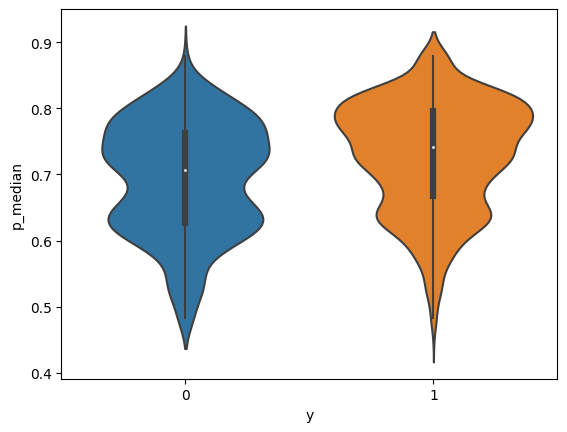

In [36]:
# うまくモデリングできていれば、yに対して、バイオリンの山が上下に行くはず
results = pd.DataFrame({"p_median":y_cf, "y":df3["Y"]})

fig, ax = plt.subplots()
sns.violinplot(results, x="y", y="p_median")
plt.show()

In [39]:
df2.head()

,PersonID,A,Score,M,Y,Ratio
0,1,0,0.345,43,38,0.883721
1,2,1,0.725,56,40,0.714286
2,3,0,0.625,32,24,0.750000
3,4,1,0.430,45,33,0.733333
4,5,1,0.790,33,23,0.696970


In [51]:
df2.groupby(A)["M"].mean()

A
0    42.733333
1    55.700000
Name: M, dtype: float64

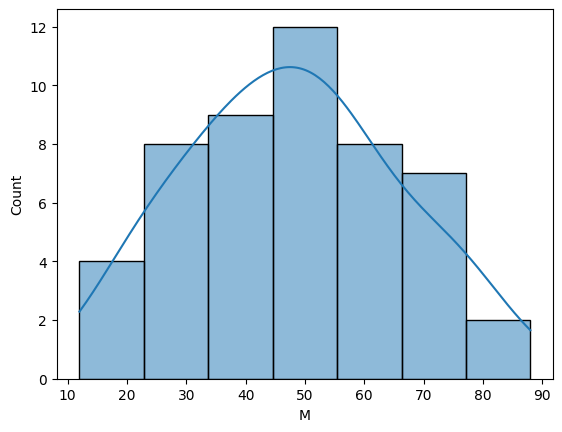

In [41]:
fig, ax = plt.subplots()
sns.histplot(df2["M"], kde=True, ax=ax)
plt.show()

In [44]:
# バイトの有無と昨年度の点数の、総授業回数の関係性を知りたい

model4 = pm.Model()

with model4:
    A_data = pm.Data("A_data", df2["A"], mutable=True)
    Score_data = pm.Data("Score_data", df2["Score"], mutable=True)
    M_data = pm.Data("M_data", df2['M'], mutable=True)

    b1 = pm.Normal("b1", mu=0.0, sigma=10.0)
    b2 = pm.Normal("b2", mu=0.0, sigma=10.0)
    b3 = pm.Normal("b3", mu=0.0, sigma=10.0)

    # 学生のバイト有無と去年のテストの点数で、そう授業回数が従うポアソン分布のパラメータが決まる
    lamb = pm.Deterministic('lamb', pm.math.exp(b1 + b2*A_data + b3*Score_data))
    M_obs = pm.Poisson("M_obs", mu=lamb, observed=M_data)

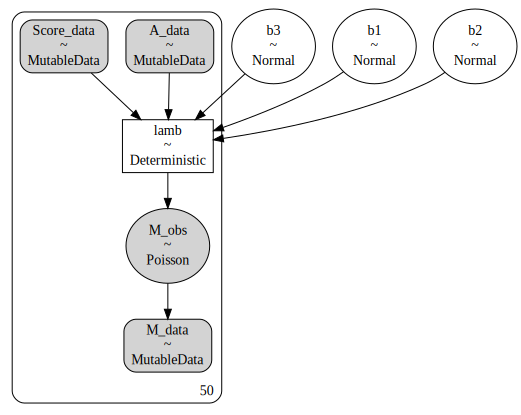

In [45]:
pm.model_to_graphviz(model4)

In [47]:
with model4:
    idata4 = pm.sample(draws=3000, tune=1000, chains=3, random_seed=42)

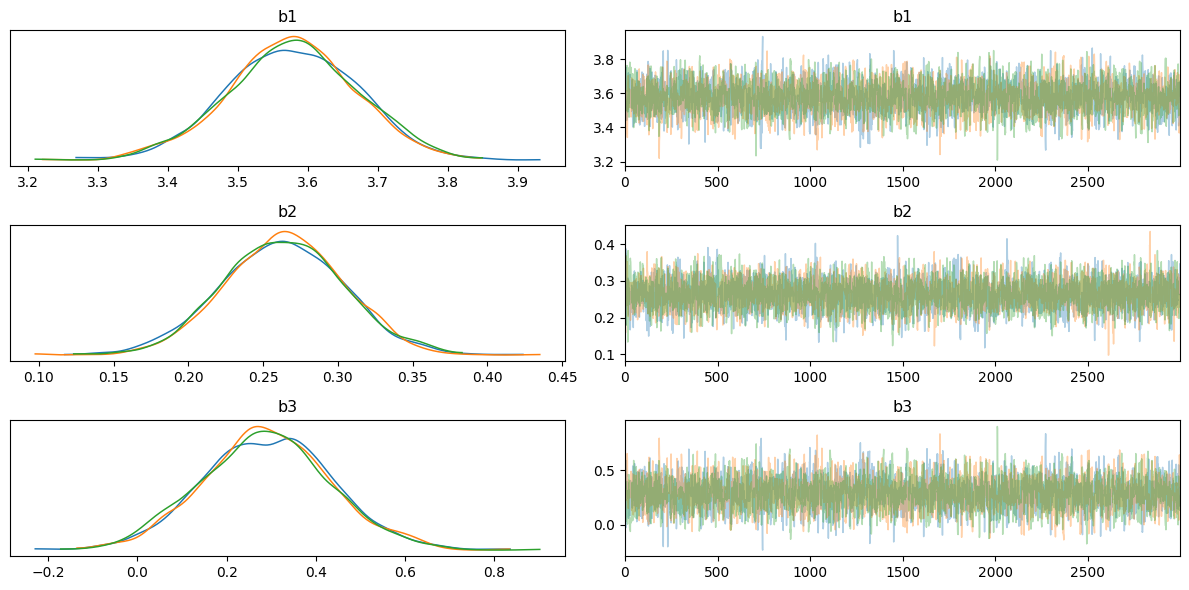

In [48]:
az.plot_trace(idata4, compact=False, var_names=["b1", "b2", "b3"])
plt.tight_layout();

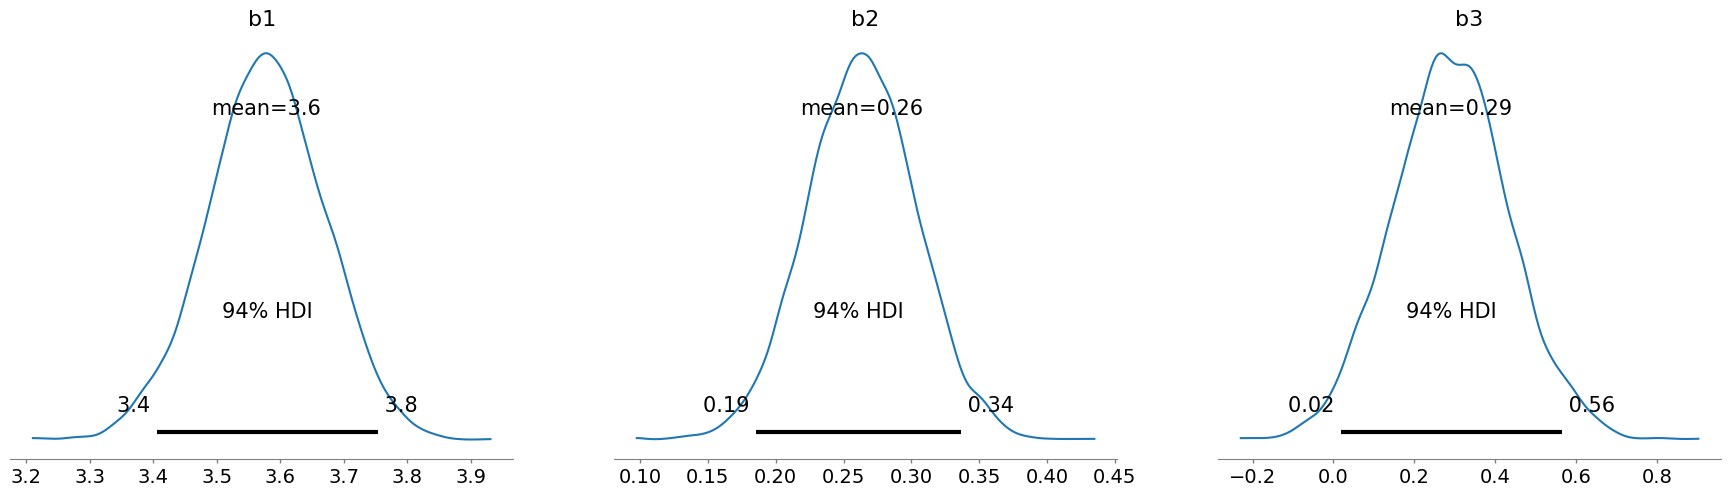

In [50]:
az.plot_posterior(idata4, var_names=["b1", "b2", "b3"]);

In [52]:
az.summary(idata4, var_names=["b1", "b2", "b3"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b1,3.578,0.092,3.406,3.754,0.002,0.001,3434.0,3742.0,1.0
b2,0.263,0.040,0.185,0.337,0.001,0.000,4609.0,3944.0,1.0
b3,0.290,0.144,0.020,0.564,0.002,0.002,3395.0,3547.0,1.0


練習問題(3)  
曇りと雨の影響も推定して出席するか否かのロジスティック回帰モデル

In [56]:
df3_2 = pd.concat([df3, pd.get_dummies(df3["Weather"], drop_first=True)], axis=1)
df3_2.head()

,PersonID,A,Score,Weather,Y,Weather_num,B,C
0,1,0,0.345,B,1,0.2,1,0
1,1,0,0.345,A,1,0.0,0,0
2,1,0,0.345,C,1,1.0,0,1
3,1,0,0.345,A,1,0.0,0,0
4,1,0,0.345,B,1,0.2,1,0


In [60]:
model5 = pm.Model()

with model5:
    A_data = pm.Data("A_data", df3_2["A"], mutable=True)
    Score_data = pm.Data("Score_data", df3_2["Score"], mutable=True)
    WB_data = pm.Data("WB_data", df3_2["B"], mutable=True)
    WC_data = pm.Data("WC_data", df3_2["C"], mutable=True)
    Y_data = pm.Data("Y_data", df3_2["Y"], mutable=True)

    b1 = pm.Normal("b1", mu=0.0, sigma=10.0)
    b2 = pm.Normal("b2", mu=0.0, sigma=10.0)
    b3 = pm.Normal("b3", mu=0.0, sigma=10.0)
    b_wb = pm.Normal("b_wb", mu=0.0, sigma=10.0) # 曇りの影響度
    b_wc = pm.Normal("b_wc", mu=0.0, sigma=10.0) # 雨の影響度

    p = pm.Deterministic("p", pm.invlogit( b1 + b2*A_data + b3*Score_data + b_wb*WB_data + b_wc*WC_data ))
    y_obs = pm.Bernoulli("y_obs", p=p, observed=Y_data)

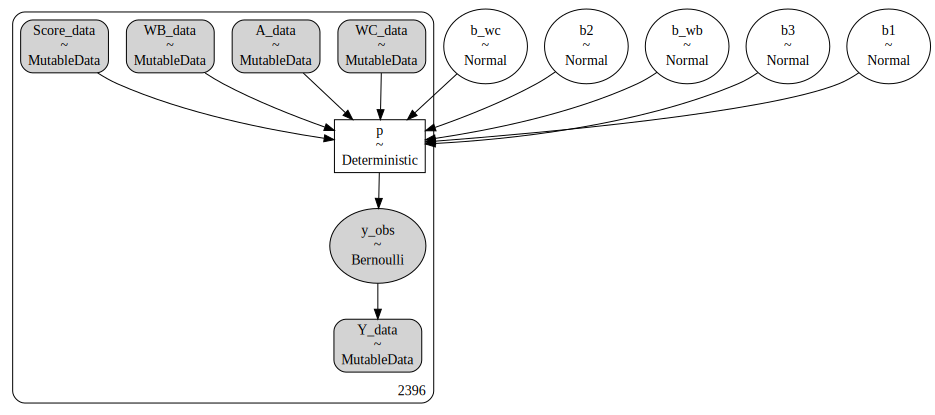

In [62]:
pm.model_to_graphviz(model5)

In [63]:
with model5:
    idata5 = pm.sample(draws=3000, tune=1000, chains=3, random_seed=42)

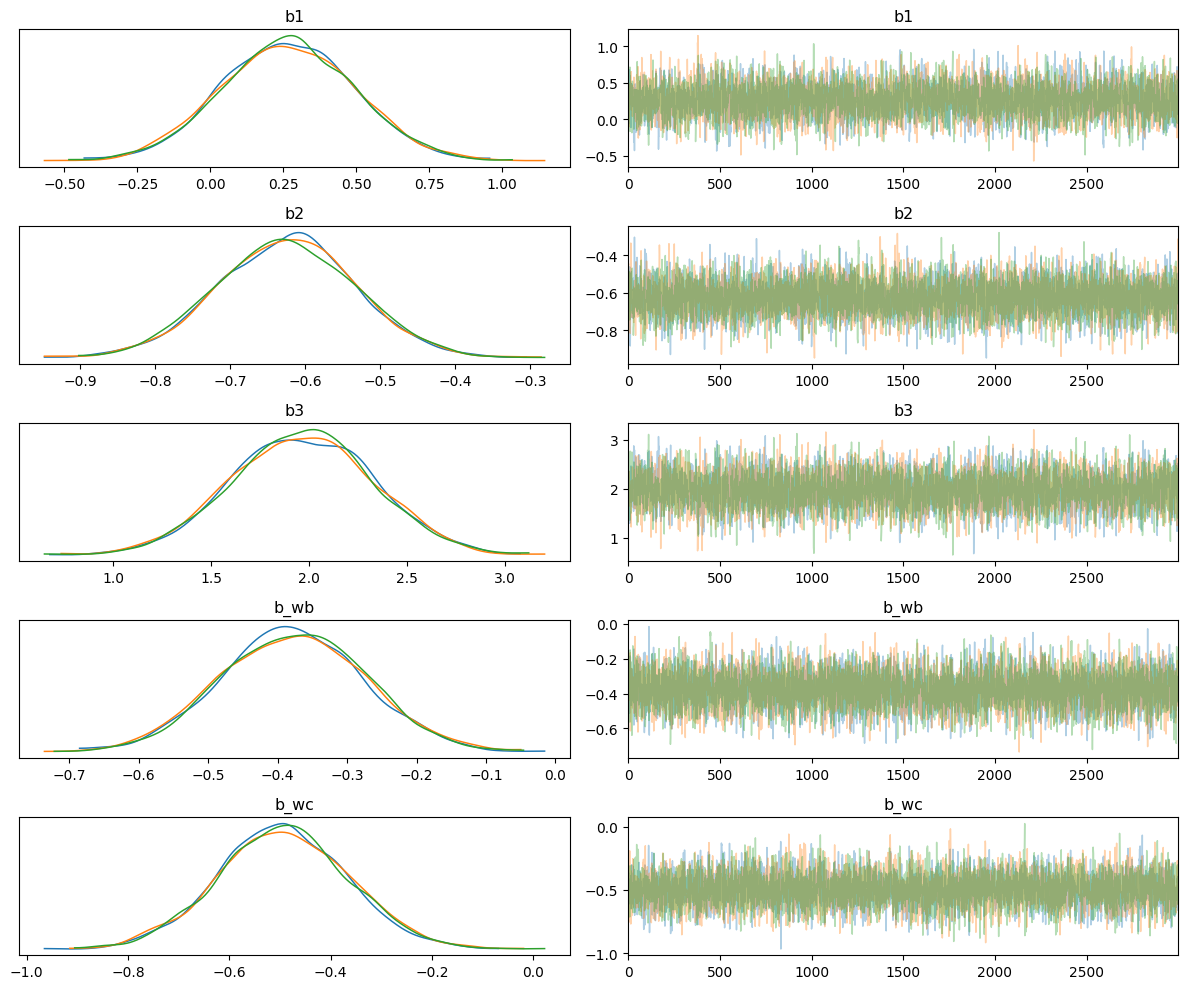

In [64]:
az.plot_trace(idata5, compact=False, var_names=["b1", "b2", "b3", "b_wb", "b_wc"])
plt.tight_layout();

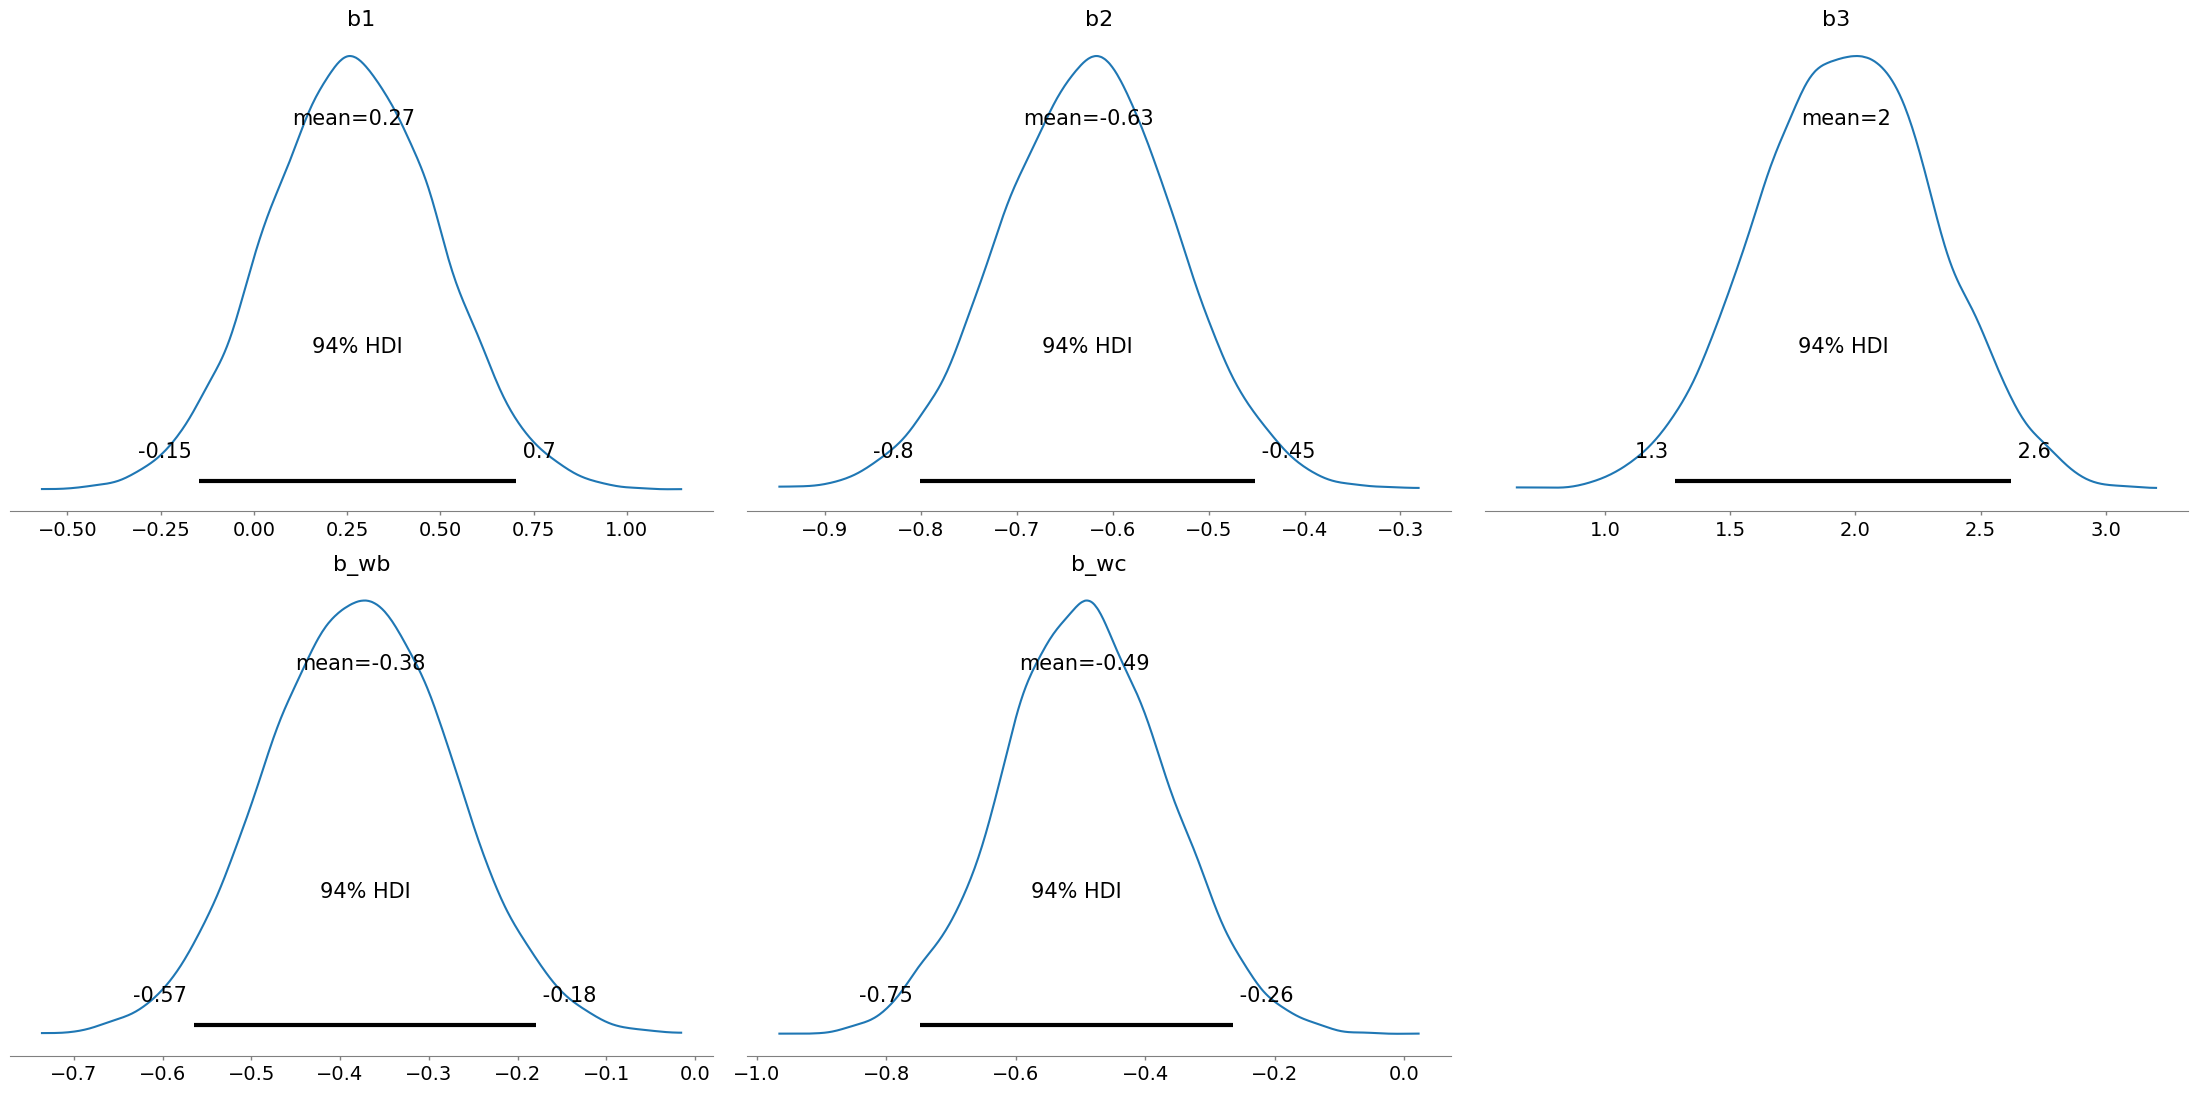

In [65]:
az.plot_posterior(idata5, var_names=["b1", "b2", "b3", "b_wb", "b_wc"])
plt.tight_layout();

In [66]:
az.summary(idata5, var_names=["b1", "b2", "b3", "b_wb", "b_wc"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b1,0.266,0.227,-0.148,0.703,0.003,0.002,5119.0,5023.0,1.0
b2,-0.625,0.093,-0.801,-0.452,0.001,0.001,6598.0,5395.0,1.0
b3,1.964,0.359,1.280,2.622,0.005,0.003,5326.0,5101.0,1.0
b_wb,-0.378,0.103,-0.565,-0.179,0.001,0.001,6984.0,6178.0,1.0
b_wc,-0.494,0.127,-0.748,-0.264,0.002,0.001,6089.0,4873.0,1.0


In [67]:
with model5:
    pm.sample_posterior_predictive(idata5, extend_inferencedata=True, random_seed=42)

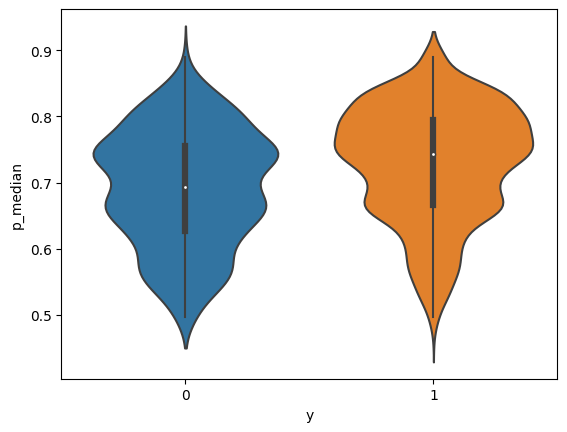

In [68]:
#y_cf = np.quantile(idata3["posterior_predictive"]["y_obs"].to_numpy().reshape(-1, len(df3)), 0.50, axis=0) # (2396, )
# 各学生の出席確率pの予測分布からの予測の中央値を代表地としてとる
y_cf = np.quantile(idata5["posterior"]["p"].to_numpy().reshape(-1, len(df3_2)), 0.50, axis=0) # (2396, )

# うまくモデリングできていれば、yに対して、バイオリンの山が上下に行くはず
results = pd.DataFrame({"p_median":y_cf, "y":df3_2["Y"]})

fig, ax = plt.subplots()
sns.violinplot(results, x="y", y="p_median")
plt.show()